<img src="MatchBrand%20symbol.png" alt="MatchBrand Symbol">


# **Instagram Dataset Preprocessing**

# A. Load Libraries

In [33]:

# Import pip packages in alphabetical order to avoid duplicates
'''
!pip install deep_translator
!pip install ipywidgets
!pip install spacy
!pip install torch
!pip install transformers
!pip install wordcloud
!pip install wordninja
!pip install ydata-profiling


# Download the English language model for spaCy
!python -m spacy download en_core_web_sm
'''

'\n!pip install deep_translator\n!pip install ipywidgets\n!pip install spacy\n!pip install torch\n!pip install transformers\n!pip install wordcloud\n!pip install wordninja\n!pip install ydata-profiling\n\n\n# Download the English language model for spaCy\n!python -m spacy download en_core_web_sm\n'

In [34]:
# Import packages in alphabetical order to avoid duplicates
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import pickle
import re
import spacy
import string
import torch
import wordninja

# Import packages in alphabetical order to avoid duplicates
from collections import Counter
from deep_translator import GoogleTranslator
from gensim.models import Word2Vec
from ipywidgets import HTML, Button, widgets
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer
from nltk.tokenize import word_tokenize
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from textwrap import wrap
from transformers import BertModel, BertTokenizer, pipeline
from wordcloud import WordCloud
from ydata_profiling import ProfileReport

# B. Read in the Data

The Instagram dataset we are working with is provided by our partner, MatchBrand, and comprises eight Instagram profiles. Our main objective is to achieve our set goals effectively, and to accomplish this, we initiated the data cleaning process by removing unnecessary columns. We conducted a visual screening of the dataset in a text editor program to identify the columns that could be dropped. However, during the Exploratory Data Analysis (EDA) using ydata Profile Report in the Notebook, we encountered memory storage limitations. As a result, we first droped unneeded columns before proceeding with the EDA. We kept the columns 'caption', 'ownerID' and 'ownerUsername'.

In [35]:
# Reading in the instagram dataset
df = pd.read_csv("Datasets/dataset_hwr_instagram_profiles.csv",encoding = "ISO-8859-1")

# Remove unnecessary columns
df_new = df[['caption', 'ownerId', 'ownerUsername']]

# Remove null values from 'caption' column
df_new = df_new.dropna(subset = ['caption'])

# Reset index
df_new = df_new.reset_index(drop=True)

C:\Users\loeb\AppData\Local\Temp\ipykernel_27928\1556134648.py:2: DtypeWarning: Columns (2,18,20,21,22,23,25,26,27,28,30,31,32,33,35,36,37,38,40,41,42,43,45,46,47,48,50,51,52,53,55,56,57,58,60,61,62,63,65,66,67,68,70,71,72,73,75,76,77,78,80,81,82,83,85,86,87,88,90,91,92,93,95,96,97,98,100,101,102,107,109,125,127,128,129,130,132,133,134,135,137,138,139,140,142,143,144,145,147,148,149,150,152,153,154,155,157,158,159,162,163,164,165,167,168,169,170,172,173,174,175,177,178,179,180,182,183,184,189,191,202,204,205,206,207,209,210,211,212,214,215,216,217,219,220,221,222,224,225,226,231,233,244,246,247,248,249,251,252,253,258,271,273,274,275,276,278,279,280,281,283,284,285,288,289,290,291,293,294,295,298,299,300,301,303,304,305,306,308,309,310,311,313,314,315,320,333,335,336,337,338,340,341,342,347,360,362,363,364,365,367,368,369,370,372,373,374,379,392,394,395,396,397,399,400,401,402,404,405,406,407,409,410,411,412,414,415,416,421,434,436,437,438,439,441,442,443,448,455,460,461,463,464,465,46

# C. Exploratory Data Analysis - Profile Report

At the outset, we initiated an exploratory data analysis to gain a comprehensive understanding of our Instagram dataset. To streamline this process and ensure efficient insights, we utilized the ydata Profile Report, a powerful tool known for its user-friendly presentation and rapid generation of valuable information. Through this report, we were able to swiftly assess key statistical measures, visualize data distributions, and identify any potential anomalies or missing values.

During the exploratory phase, we delved into various aspects of the Instagram dataset, examining data distribution, summary statistics, correlation analyses, and data quality assessments. This thorough exploration provided us with valuable insights into the dataset's characteristics, forming a strong basis for our subsequent data cleaning and analysis endeavors.

The Report is saved as a html file in the Datasets folder to save time and computional resources. 

In [36]:
'''Uncomment if new report file is needed	
# Define output directory
output_directory = "Datasets/"

# Generate a report for the job dataset
profile = ProfileReport(df_new, title="Pandas Profiling Report Instagram Dataset")

# Save the report as HTML in the 'Datasets' directory
profile.to_file(output_file=output_directory + "instagram_profiling_report.html")
'''

'Uncomment if new report file is needed\t\n# Define output directory\noutput_directory = "Datasets/"\n\n# Generate a report for the job dataset\nprofile = ProfileReport(df_new, title="Pandas Profiling Report Instagram Dataset")\n\n# Save the report as HTML in the \'Datasets\' directory\nprofile.to_file(output_file=output_directory + "instagram_profiling_report.html")\n'

# D. Data Cleaning


After conducting a thorough data exploration to gain an overview of our Instagram dataset, we aligned on a  data cleaning strategy. Subsequently, we executed a series of vital cleaning steps, transforming the raw data into a refined and standardized form. Let's delve into the specific cleaning actions we undertook:

### **Step 1: Translate Data to English**

Recognizing the importance of aligning the job dataset with the Instagram dataset, we embarked on translating all data to English. Given the multilingual nature of the Instagram dataset, with languages like French, Italian, and German, we astutely set the source language to Auto. This strategic decision enabled us to bridge language barriers and facilitate a unified analysis of the datasets.

Additionally, due to the character limit of the Google Translator API (5000 characters), we implemented a loop to translate the data in smaller batches. This approach ensures that the entire dataset is translated accurately and efficiently, overcoming any limitations imposed by the API.

### **Step 2: Define Data Cleaning Function `data_clean`**

To commence the data cleaning process, we crafted a data cleaning function called data_clean. This function performed several essential actions to prepare the text data for further analysis:


**- Convert all text to lowercase:**

By converting all text to lowercase, we ensured that the data became case-insensitive. This step helped avoid duplication of words due to case differences, leading to a more coherent and consistent dataset.

**- Remove @usernames:**

This step removes mentions of users, which is useful for removing personal identifiers and reducing noise in the data.

**- Remove emojis:**

 The removal of emojis and conversion to their ASCII equivalents resulted in cleaner text representation without special characters. This technique further refined the data, fostering a more concise and informative dataset.


**- Remove numbers:**

Removing numerical values from the text was crucial for our analysis, especially if numerical information was not integral to the matching process. This step allowed us to focus on the textual content while excluding numeric noise.


**- Split words starting with "#" using wordninja:**

 Splitting hashtags using wordninja can improve readability and make hashtags more informative by breaking them into meaningful words. A limitation of this libaray is that it is only applicable to English words. As we translated all text to English beforehand, we increased the data quality significantly. A link to the wordninja libraray diving deeper into how it works and how it was trained can be found here: 
 https://github.com/keredson/wordninja


**- Remove punctuation:**

Eliminating punctuation symbols was a pivotal step in the data cleaning process. This action significantly reduced noise, standardized the text, and facilitated further analysis.


**- Remove '#' symbol:**

 This step complements the earlier step by removing any remaining "#" symbols after splitting the hashtags.


**- Clear newline and carriage return characters:**

Removing newline and carriage return characters is essential for making the text consistent and ensuring that each caption remains on a single line.


**- Remove additional words:**

In this step, we thoughtfully removed additional words that were not relevant to our analysis. By doing so, we honed in on the most significant terms, enhancing the dataset's overall quality.

**- Remove empty rows:**


Removing empty rows is a good practice to clean up the dataset and ensure that only valid data remains for further analysis.


### **Step 3: Expanding Contractions & Short Forms**

In this step, we focused on expanding contractions and short forms present in the text. By converting abbreviated words and contractions into their full forms, we ensured a more readable and consistent representation of the data. For instance, words like "can't" were expanded to "can not," and "gonna" was transformed into "going to," improving text uniformity and preparing the data for in-depth analysis.


### **Step 4: Remove English Stopwords**

Further refining the dataset, we diligently removed common English stopwords. These words, such as "the," "is," and "and," typically do not contribute significantly to the meaning of the text and can introduce noise. Eliminating stopwords refined the dataset, facilitating a more focused and insightful analysis.

### **Step 5: Remove Short Words**

Short words, typically consisting of fewer than three characters, were thoughtfully removed from the dataset. These words often lack meaningful semantic value and can introduce irrelevant noise. By filtering out short words, we ensured that the dataset primarily comprises informative and substantial terms.

### **Step 6: Drop Null Values**

To uphold the dataset's cleanliness and integrity, we conscientiously dropped any remaining null values. Null values may occur due to missing or incomplete data, and removing them ensures a complete and reliable dataset for subsequent analyses.

### **Step 7: Save as Pickle File**

To optimize future workflows and avoid unnecessary repetition, we saved the cleaned job dataset as a pickle file. The pickle file format efficiently preserves the data structure, allowing us to effortlessly reload the cleaned dataset without repeating the data cleaning process. This decision streamlined our analysis and saved valuable time and computational resources.


## **Step 1: Translate Data to English**

In [37]:
# Defining a function to translate text to English
def translate_text(text):
    try:
        if isinstance(text, str):
            if len(text) <= 5000:
                return translator.translate(text)
            else:
                # Split the text into chunks of 5000 characters or less
                chunks = wrap(text, 5000)
                translated_chunks = []
                # Translate each chunk individually
                for chunk in chunks:
                    translated_chunks.append(translator.translate(chunk))
                # Reassemble the translated chunks into a single string
                return ' '.join(translated_chunks)
    except:
        pass
    return text

translator = GoogleTranslator(source='auto', target='english')

# Translate every valid cell in the DataFrame
df_translated = df_new.applymap(translate_text)


## **Step 2: Define Data Cleaning Function `data_clean`**

In [38]:
# Defining a data cleaning function data_clean()
def data_clean(df_translated):
    # Lower case
    df_translated['caption'] = df_translated['caption'].str.lower()

    # Remove @usernames
    df_translated['caption'] = df_translated['caption'].apply(lambda x: re.sub(r'@\w*', '', x))

    # Remove emojis
    df_translated["caption"] = df_translated["caption"].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

    # Remove numbers
    df_translated['caption'] = df_translated['caption'].apply(lambda x: re.sub(r'\d+', '', x))

    # Split words starting with "#" using wordninja
    df_translated['caption'] = df_translated['caption'].apply(lambda x: ' '.join([wordninja.split(word)[0] if word.startswith('#') and len(word) > 1 else word for word in x.split()]))

    # Remove punctuation
    df_translated['caption'] = df_translated['caption'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

    # Remove '#' symbol
    df_translated['caption'] = df_translated['caption'].apply(lambda x: x.replace('#', ''))

    # Clear newline and carriage return characters
    df_translated['caption'] = df_translated['caption'].apply(lambda x: re.sub(r'[\n\r]', '', x))

    # Remove additional words
    additional_words = ['swagmasterz','aka', 'goerlich', 'fyp', 'oootd', 'parr', 'les', 'este', 'nxy', 'swag', 
                        'qua', 'bitches','gram', 'neuk', 'inspo', 'marie', 'luigi', 'per', 'tago', "chb", 'cuckoo',
                        'fav', 'aps', 'lland', 'iii', 'fdk', 'icarus', 'kap', 'wohlfhlbttel']  
    df_translated['caption'] = df_translated['caption'].apply(lambda x: ' '.join(word for word in x.lower().split() if word not in additional_words))

    # Remove empty rows
    df_translated = df_translated.dropna()

    return df_translated


In [39]:
# Apply data_clean function to df_new
df_cleaned = data_clean(df_translated)

## **Step 3: Expanding Contractions & Short Forms**

In [40]:
# Create con_dict and con_re
con_dict = {
    "isn't": "is not",
    "aren't": "are not",
    "cant": "can not",
    "wasn't": "was not",
    "weren't": "were not",
    "haven't": "have not",
    "hasn't": "has not",
    "hadn't": "had not",
    "won't": "will not",
    "wont": "will not",
    "wouldn't": "would not",
    "don't": "do not",
    "dont": "do not",
    "doesn't": "does not",
    "didn't": "did not",
    "can't": "can not",
    "couldn't": "could not",
    "shouldn't": "should not",
    "mightn't": "might not",
    "mustn't": "must not",
    "'s": " is",
    "'re": " are",
    "'m": " am",
    "'ll": " will",
    "'d": " would",
    "luv": "love",
    "gonna": "going to",
    "ya": "your",
    "feb": "february",
    "roma": "rome",
    "insta": "instagram",
    "lln": "neukölln",
    "fluffyyy": "fluffy",
    "thanks": "thank you",
    "analogue": "analog",
    "berlin berlin": "berlin",
    "interior interior": "interior",
    "vibez": "vibes",
    "analog analog": "analog",
    "color": "colour",
    "favorite": "favourite",
    "diy": "do it yourself",
    "diy diy": "do it yourself",
}

con_re = re.compile('(%s)' % '|'.join(con_dict.keys()))

# Define function to expand contractions
def expand_contractions(text, contractions_dict=con_dict, contractions_re=con_re):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Apply expand_contractions to the caption column
df_cleaned['caption'] = df_cleaned['caption'].apply(lambda row: expand_contractions(row))


## **Step 4: Remove English Stopwords**

In [41]:
# Remove stopwords from the translated dataframe
stopwords_english = set(stopwords.words("english"))
nltk.download('stopwords')
nltk.download('punkt')

# Define a function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_english]
        return " ".join(filtered_tokens)
    return text
for col in df_translated.columns:
    df_cleaned[col] = df_cleaned[col].apply(remove_stopwords)

# Apply remove stopwords function to the cleaned dataframe
df_english_without_stopwords = df_cleaned

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\loeb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\loeb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **Step 5: Remove Short Words**

In [42]:
# Delete words with less than three characters
df_english_without_stopwords['caption'] = df_english_without_stopwords['caption'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

## **Step 6: Drop Null Values**

In [43]:
# Drop null values
df_english_without_stopwords['caption'].replace('', np.nan, inplace=True)
df_english_without_stopwords = df_english_without_stopwords.dropna(subset=['caption'])


## **Step 7: Save as Pickle File**

In [44]:
#Save DataFrame
with open('Datasets/df_translated_instagram.pkl', 'wb') as f:
    pickle.dump(df_english_without_stopwords, f)

# E. Data Review with Wordcloud


After completing the data cleaning process, we utilized the Wordcloud visualization to explore potential interests and topics within our refined Instagram dataset. The Wordcloud offered an insightful and visually engaging representation of the most frequent words found in the captions of the Instagram profiles. By examining the prominent terms displayed in the Wordcloud, we were able to gain valuable insights into the prevalent themes and subjects that capture the attention and engagement of the Instagram users in our dataset. This analysis provided us with a deeper understanding of the content preferences and interests of the profiles, helping us uncover relevant topics and trends that could be further explored in our matching and analysis tasks.


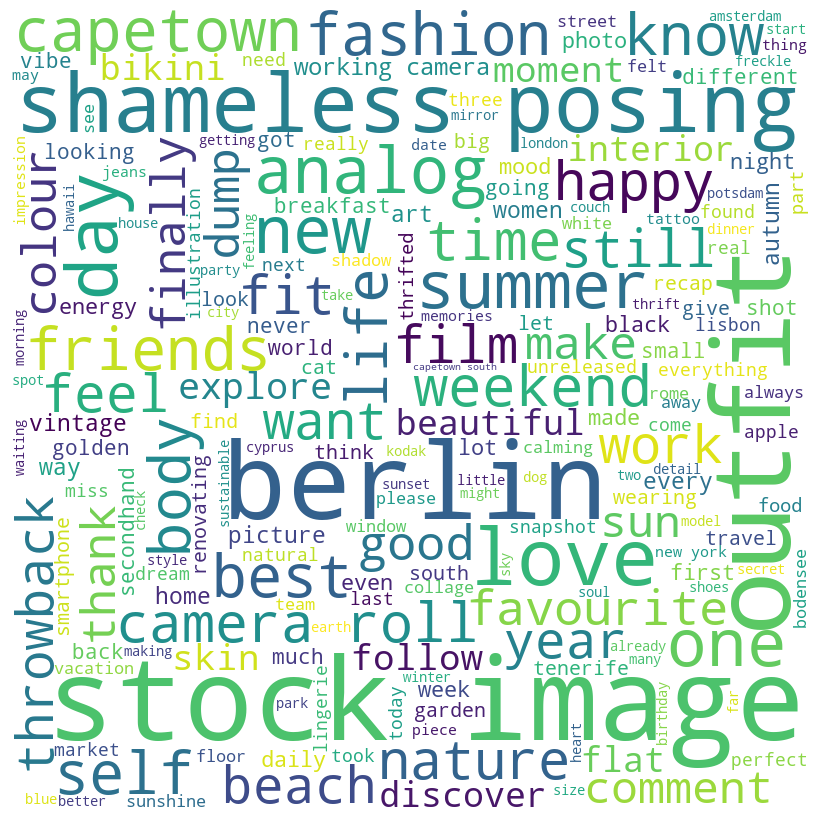

In [45]:
# Concatenate all text data in your DataFrame. For example, let's assume you're interested in a column named 'caption'
text = ' '.join(df_english_without_stopwords['caption'])

# Generate the Wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = None, 
                      min_font_size = 10).generate(text) 

# Plot the Wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

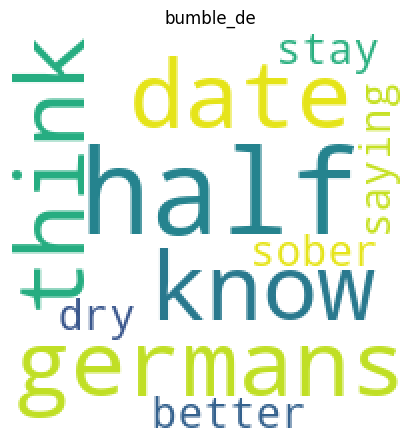

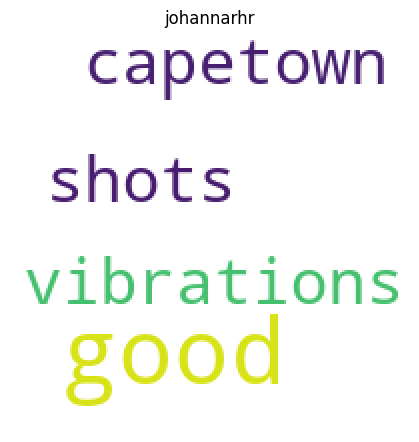

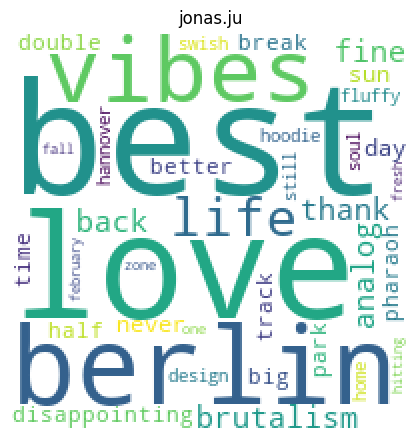

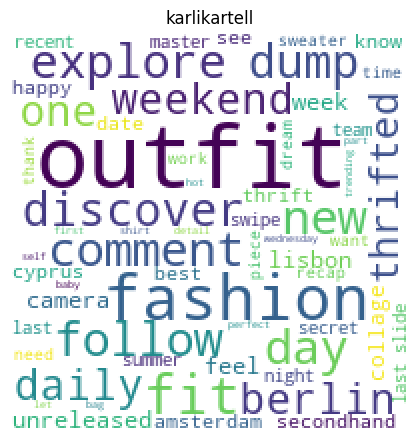

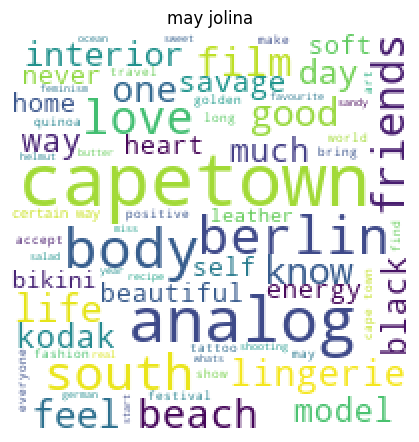

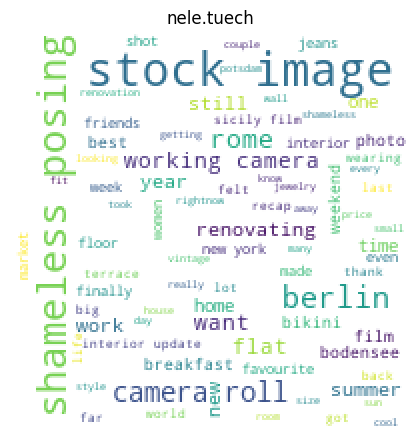

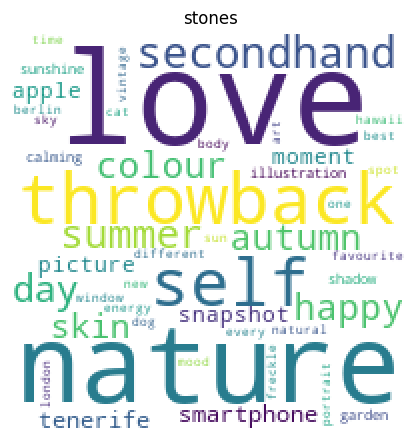

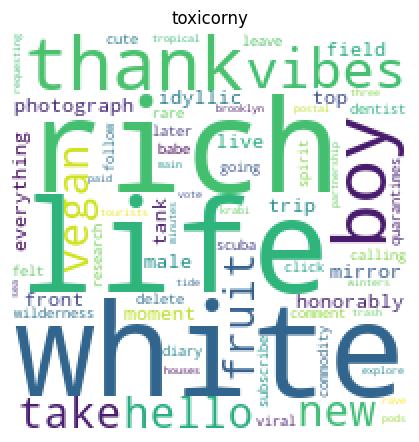

In [46]:
# Group by username and join all text into a single string
grouped = df_english_without_stopwords.groupby('ownerUsername')['caption'].apply(' '.join).reset_index()
# For each username
for index, row in grouped.iterrows():
    # Create a Wordcloud
    wordcloud = WordCloud(width = 200, height = 200, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 5).generate(row['caption'])
  
    # Plot the Wordcloud                    
    plt.figure(figsize = (4, 4), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(row['ownerUsername'])
    plt.show()